<h1 style="text-align:center; color:purple; font-size:60px;">
    Paradox
</h1>


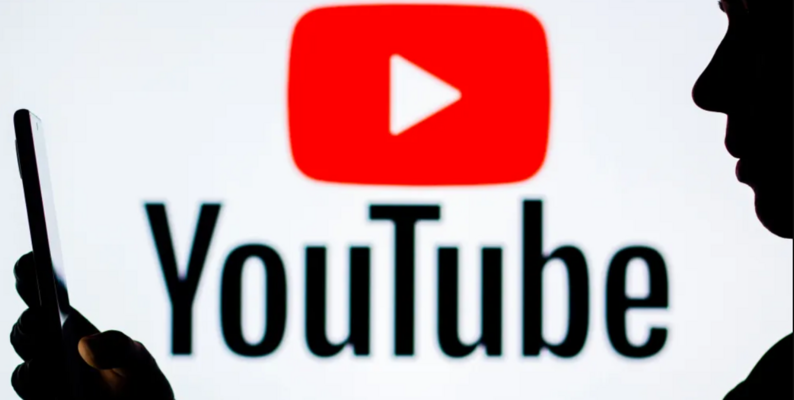

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder

### Loading the dataset

In [2]:
df = pd.read_csv('train.csv')
df = df[pd.notnull(df['Comment'])]
df.head(10)

,Comment,Label
0,last proof me kaha gaya little confused about it,doubt
1,sir g ki value positive hogi,doubt
2,like the video guyssss,irrelevant
3,ummm sir i want see ur wife,irrelevant
4,physics wallah punabi mundamundi mein thusde d...,irrelevant
5,bhupesh,irrelevant
6,thx dedi,feedback
7,good mem thank you,feedback
8,sir hmko square ka center of mass wala nhi smj...,doubt
9,for constant pressure qcalorieducaloriewfor co...,feedback


### Data Cleaning and PreProcessing

In [3]:
ps = PorterStemmer()

def clean_and_stem_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    text = ' '.join(ps.stem(word) for word in text.split())  # Stemming
    return text

df['Comment'] = df['Comment'].apply(clean_and_stem_text)

### Applying label encoder

In [4]:
label_encoder = LabelEncoder()
df['labels_encoded'] = label_encoder.fit_transform(df['Label'])

mapped = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapped)

{'doubt': 0, 'feedback': 1, 'irrelevant': 2}


### Splitting the data into train and test data

In [5]:
from sklearn.model_selection import train_test_split
X = df['Comment']
y = df['labels_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Finding the best value of max_features

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

max_features_values = [140000, 145000, 150000, 151000, 152000]

best_score = 0
best_features = 0

for max_features in max_features_values:
    tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(1, 2))
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1200)
    model.fit(X_train_tfidf, y_train)

    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Max features: {max_features} - Accuracy: {accuracy}")

    if accuracy > best_score:
        best_score = accuracy
        best_features = max_features

print(f"Best max_features: {best_features} with Accuracy: {best_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Max features: 140000 - Accuracy: 0.7105964912280702


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Max features: 145000 - Accuracy: 0.7107368421052631


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Max features: 150000 - Accuracy: 0.7112046783625731


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Max features: 151000 - Accuracy: 0.7101052631578947


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Max features: 152000 - Accuracy: 0.7108538011695906
Best max_features: 150000 with Accuracy: 0.7112046783625731


### Converting Text Data to TF-IDF Feature Vectors with Unigrams and Bigrams

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=150000, ngram_range=(1, 2))
 #Adjusted acc to our data

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Hyperparameter Tuning

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

solvers = ['lbfgs', 'newton-cg', 'sag', 'saga']
multi_classes = ['ovr', 'multinomial']

for solver in solvers:
    for multi_class in multi_classes:
        print(f"\nEvaluating with solver: {solver} and multi_class: {multi_class}")

        model = LogisticRegression(multi_class=multi_class, solver=solver, max_iter=3000)
        model.fit(X_train_tfidf, y_train)

        y_pred = model.predict(X_test_tfidf)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy with {solver} and {multi_class}: {accuracy:.4f}")


Evaluating with solver: lbfgs and multi_class: ovr


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy with lbfgs and ovr: 0.7112

Evaluating with solver: lbfgs and multi_class: multinomial


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy with lbfgs and multinomial: 0.7066

Evaluating with solver: newton-cg and multi_class: ovr


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy with newton-cg and ovr: 0.7107

Evaluating with solver: newton-cg and multi_class: multinomial


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy with newton-cg and multinomial: 0.7075

Evaluating with solver: sag and multi_class: ovr


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy with sag and ovr: 0.7106

Evaluating with solver: sag and multi_class: multinomial


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy with sag and multinomial: 0.7073

Evaluating with solver: saga and multi_class: ovr


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy with saga and ovr: 0.7105

Evaluating with solver: saga and multi_class: multinomial


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy with saga and multinomial: 0.7074


### Model Fitting

In [9]:
model = LogisticRegression(multi_class="ovr", solver='lbfgs', max_iter=500)
model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='ovr')

### Making Predictions and evaluating the model

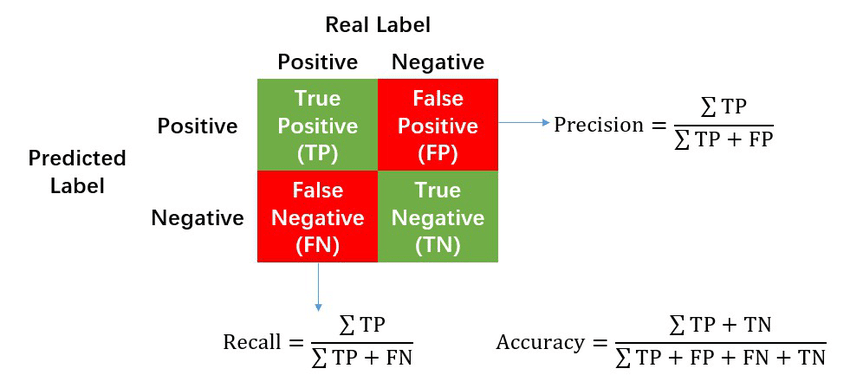

In [10]:
y_pred = model.predict(X_test_tfidf)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy:  0.7112046783625731

Classification Report:
               precision    recall  f1-score   support

       doubt       0.72      0.72      0.72     11067
    feedback       0.71      0.77      0.74     19131
  irrelevant       0.71      0.62      0.66     12552

    accuracy                           0.71     42750
   macro avg       0.71      0.70      0.71     42750
weighted avg       0.71      0.71      0.71     42750



In [11]:
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
doubt,0.723371,0.717358,0.720352,11067.000000
feedback,0.707777,0.769745,0.737462,19131.000000
irrelevant,0.705534,0.616555,0.658050,12552.000000
accuracy,0.711205,0.711205,0.711205,0.711205
macro avg,0.712227,0.701219,0.705288,42750.000000
weighted avg,0.711155,0.711205,0.709716,42750.000000


### Saving the model for future purpose

In [12]:
import pickle

with open("Trained_Model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("tfidf_transformer.pkl", "wb") as f:
    pickle.dump(tfidf, f)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

### Performing visualizations

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Accuracy: ", accuracy_score(y_test, y_pred))

report_dict = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

classes = report_df.index[:-3] 
precision = report_df.loc[classes, 'precision']
recall = report_df.loc[classes, 'recall']
f1_score = report_df.loc[classes, 'f1-score']
support = report_df.loc[classes, 'support']


Accuracy:  0.7112046783625731


<ipython-input-14-059e73174a01>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=precision, ax=axes[0], palette="viridis")
<ipython-input-14-059e73174a01>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=recall, ax=axes[1], palette="viridis")
<ipython-input-14-059e73174a01>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=f1_score, ax=axes[2], palette="viridis")


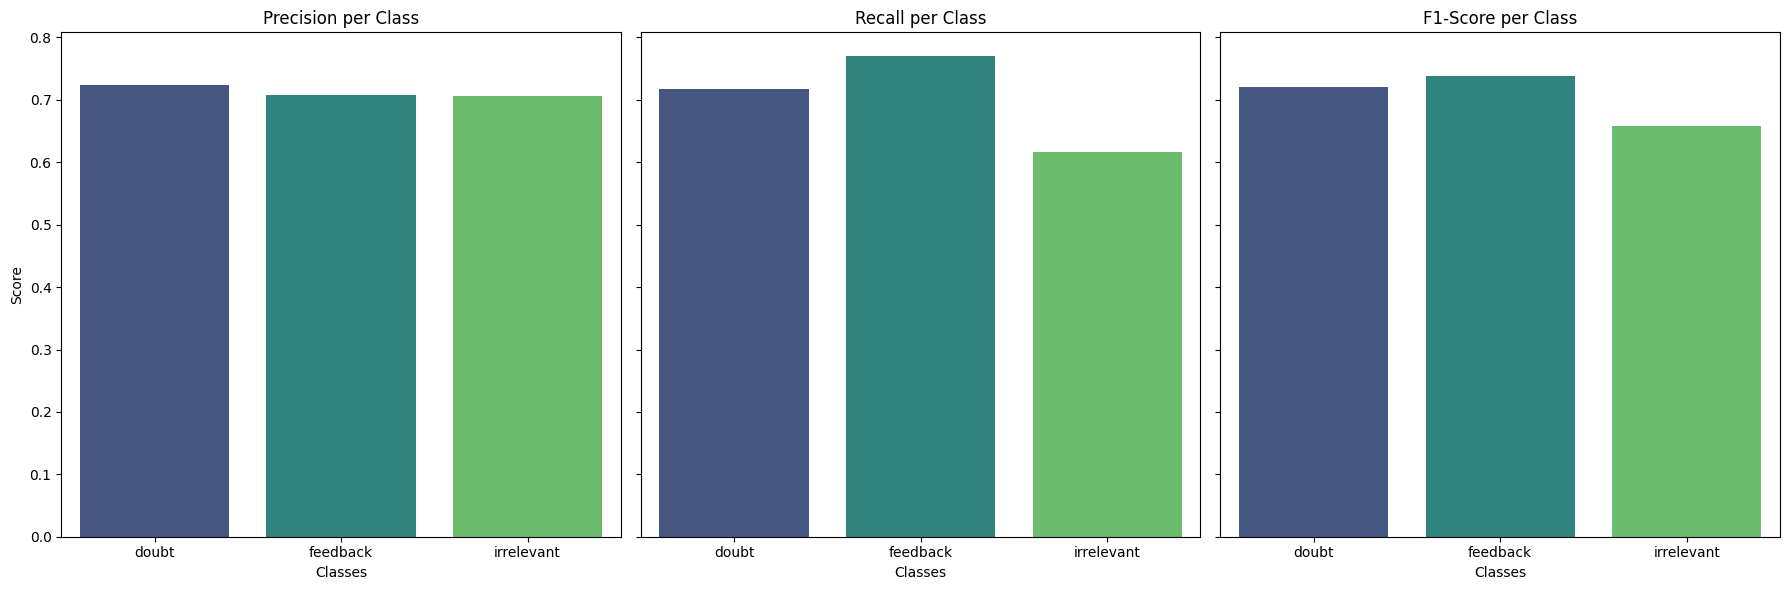

In [14]:
# Precision, recall and f1-score plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Precision Plot
sns.barplot(x=classes, y=precision, ax=axes[0], palette="viridis")
axes[0].set_title("Precision per Class")
axes[0].set_xlabel("Classes")
axes[0].set_ylabel("Score")

# Recall Plot
sns.barplot(x=classes, y=recall, ax=axes[1], palette="viridis")
axes[1].set_title("Recall per Class")
axes[1].set_xlabel("Classes")

# F1-Score Plot
sns.barplot(x=classes, y=f1_score, ax=axes[2], palette="viridis")
axes[2].set_title("F1-Score per Class")
axes[2].set_xlabel("Classes")

plt.tight_layout()
plt.show()


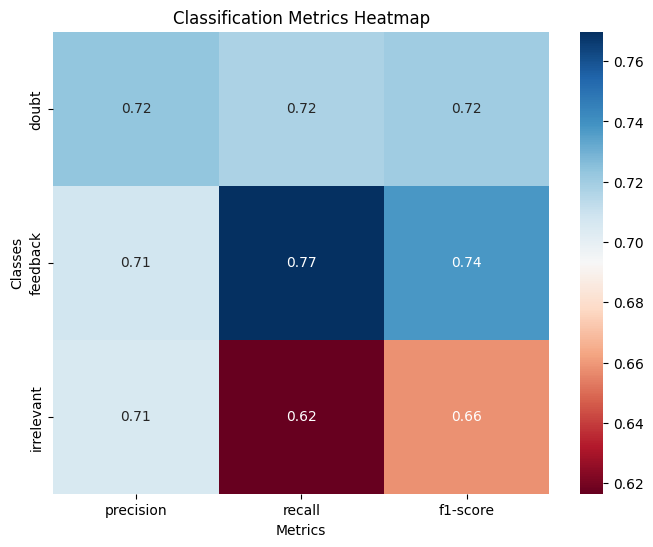

In [15]:
metrics_df = report_df.loc[classes, ['precision', 'recall', 'f1-score']]

plt.figure(figsize=(8, 6))
sns.heatmap(metrics_df, annot=True, cmap="RdBu", fmt=".2f", cbar=True)
plt.title("Classification Metrics Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

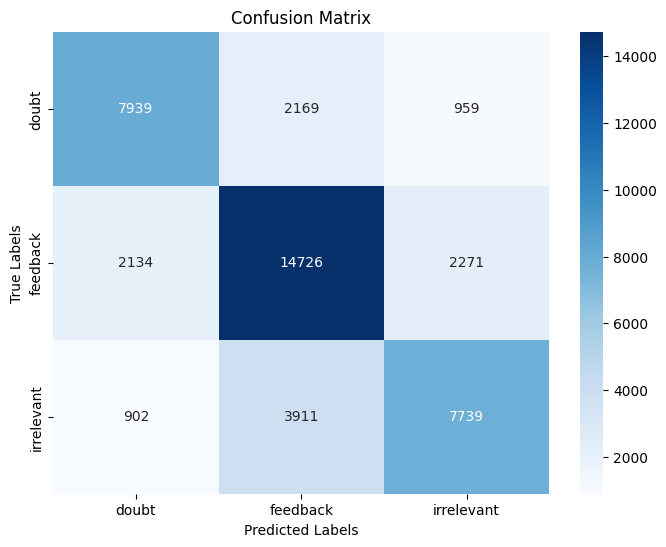

In [16]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


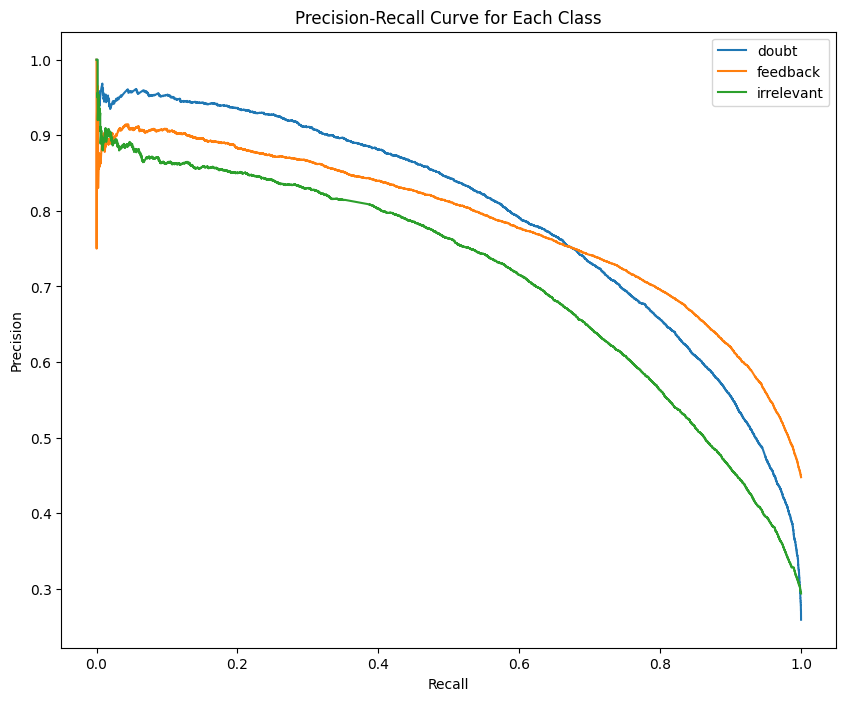

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
y_pred_proba = model.predict_proba(X_test_tfidf)  # Predicted probabilities for each class

plt.figure(figsize=(10, 8))

for i, class_name in enumerate(label_encoder.classes_):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, label=f"{class_name}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class")
plt.legend(loc="best")
plt.show()

### For making predictions on a csv file

In [ ]:
test_data = pd.read_csv('test.csv')

test_data['Comment'] = test_data['Comment'].apply(clean_and_stem_text)
X_test = tfidf.transform(test_data['Comment'])

y_pred = model.predict(X_test)

predictions = label_encoder.inverse_transform(y_pred)

test_data['Label'] = predictions

test_data[['ID', 'Label']].to_csv('71_12.csv', index=False)
print("File saved")

File saved


## Author

### [Mohd Adnan Khan](https://www.linkedin.com/in/mohd-adnan--khan)

### [Muhammed Ashrah](https://www.linkedin.com/in/muhammed-ashrah)